In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [44]:
alpha = plt.imread('alpha.jpg')

In [45]:
def image_plotting(img,ind,title):
    plt.subplot(5,3,ind)
    plt.imshow(img,cmap='gray')
    plt.title(title,fontsize=30)
    plt.savefig('assignment_9.jpg')

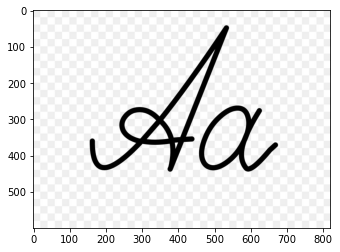

In [46]:
plt.imshow(alpha)

In [47]:
alpha_gray = cv2.cvtColor(alpha,cv2.COLOR_RGB2GRAY)
_,image = cv2.threshold(alpha_gray, 127, 255, cv2.THRESH_BINARY)
image = image ^ 255 # needs to make alphabet 1 and background 0
image = image>1

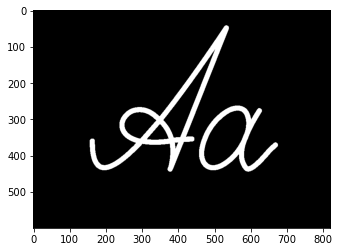

In [48]:
plt.imshow(image,cmap='gray')

In [1]:
kernel1 = np.ones((3,3),np.uint8)
kernel2 = np.array([[0.0,1,0],[1,1,1],[0,1,0]],np.uint8)
kernel3 = np.array([[1.0,1,1],[1,0,1],[1,1,1]],np.uint8)

kernel3

NameError: name 'np' is not defined

# morphological Dilation & Erosion

In [50]:
def dilate(img,kernel):
    h,w = kernel.shape
    new_img = np.zeros((img.shape[0]-h+1,img.shape[1]-w+1))
    
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            hit = np.matmul(img[i:i+h,j:j+w],kernel).sum() > 0
            new_img[i,j] = hit
            
    return new_img

In [51]:
def erode(img,kernel):
    h,w = kernel.shape
    new_img = np.zeros((img.shape[0]-h+1,img.shape[1]-w+1))
    
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            fit = np.matmul(img[i:i+h,j:j+w],kernel).sum() >= kernel.sum()
            new_img[i,j] = fit
            
    return new_img

In [52]:
erosions = []
dialations = []
opening = []
closing = []
for kernel in [kernel1,kernel2,kernel3]:
#     print(kernel)
    erosions.append(erode(image, kernel))
    dialations.append(dilate(image, kernel))
#     opening
    opening.append(dilate(erode(image,kernel),kernel))
#     closing
    closing.append(erode(dilate(image,kernel),kernel))
    

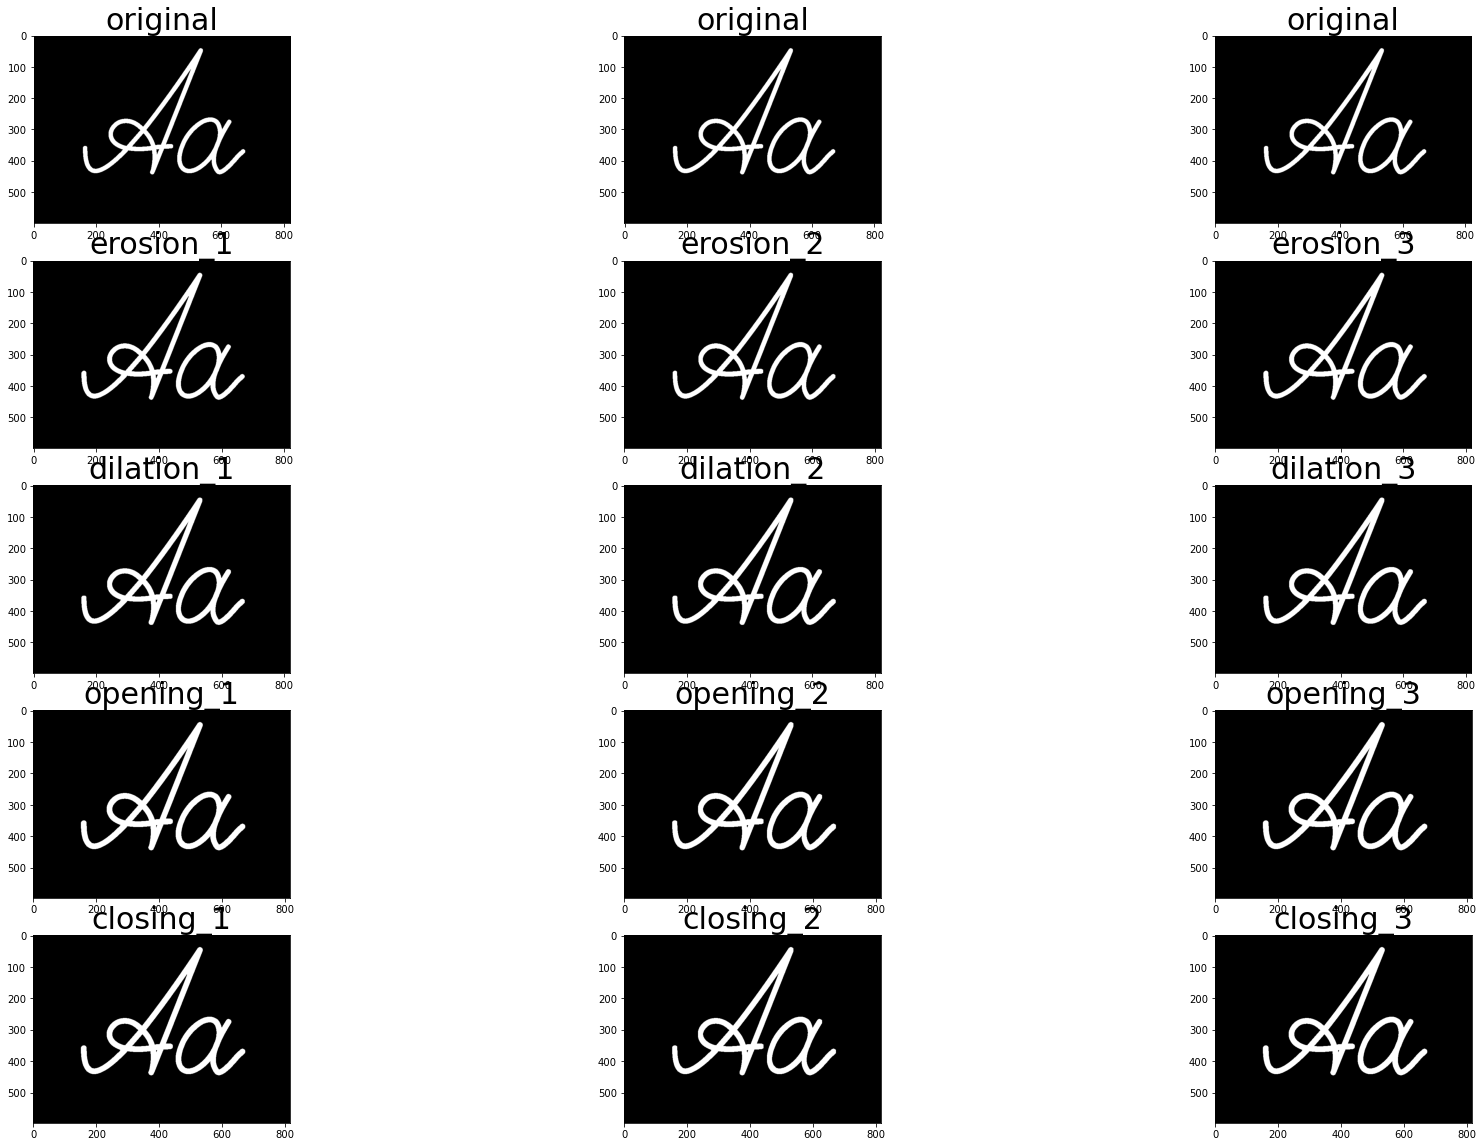

In [53]:
plt.figure(figsize=(30,20))
for i in range(3):
    image_plotting(image,i+1,'original')
    image_plotting(erosions[i],i+4,'erosion_'+str(i+1))
    image_plotting(dialations[i],i+7,'dilation_'+str(i+1))
    image_plotting(opening[i],i+3*3+1,'opening_'+str(i+1))
    image_plotting(closing[i],i+3*4+1,'closing_'+str(i+1))
    